# The Human Connectome Project 7 Tesla Retinotopy Dataset

The HCP collected retinotopic mapping data for 181 subjects. This is a huge dataset of visual function by contemporary standards. The population receptive field (PRF) maps for these mapping experiments were solved and posted on the Open Science Framework (OSF): https://osf.io/bw9ec/ (publication here: https://doi.org/10.1167/18.13.23).

The library `neuropythy` is a utility for surface-based analysis of MRI data, and it includes a number of utilities for interacting both with the HCP generally as well as with the retinotopy data specifically. We will walk through these in this notebook.

In [1]:
# Import neuropythy:
import neuropythy as ny
# We will also want a utility function to load HCP credentials.
from utils import load_aws_credentials

# Tell neuropythy about our HCP credentials and where we are saving cache files.
ny.config['hcp_credentials'] = load_aws_credentials('hcp')
ny.config['data_cache_root'] = '/tmp/cache'

Now that we have configured neuropythy, let's load a subject and look at their cortical surfaces.

In [2]:
# Load a subject:
sub = ny.hcp_subject(111312)

# Plot both their right and left hemispheres together; this will download all
# the files required for this plot (but not all of the files in the subject's
# that aren't used for this plot).
ny.cortex_plot((sub.lh, sub.rh), surface='white')

Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=0.644570721372708, p…

Neuropythy knows about most of the properties and data files included in the HCPpipelines as well as FreeSurfer. For example, if we want to color the label of V1 that is included in FreeSurfer red on the cortical surface we can do that with a simple mask:

In [3]:
ny.cortex_plot((sub.lh, sub.rh), surface='inflated', color='r', mask='V1_label')

Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=0.644570721372708, p…

## The Retinotopy Data

The retinotopy data provided on the OSF can be downloaded manually, but it is generally easier for neuropythy to manage it for you. The first time you access any retinotopy data, it will be downloaded, and this can take a bit of time, but generally, this command should run in a couple of minutes or less.

We will start by plotting the polar angle for each point on the cortical surface for which the variance of the BOLD signal explained by the PRF model is at least 10%.

In [4]:
# The mask we use is anywhere on cortex where the variance explained of
# the PRF model is between 10% and 100% (this tuple format is shorthand
# for neuropythy); 'prf_variance_explained' is a property of the cortical
# surface that neuropythy obtains from the retinotopy dataset.
mask = ('prf_variance_explained', 0.1, 1)

# We want to plot the polar angle; neuropythy knows about polar angle and
# has a colormap already prepared for it.
color = 'prf_polar_angle'

# We want to plot the inflated surfaces.
surf = 'inflated'

# Make the plot:
ny.cortex_plot((sub.lh, sub.rh), color=color, mask=mask, surface=surf)

Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=0.644570721372708, p…

The polar angle tells us the rotation around the visual field to which each point on cortex responds most strongly. The cell below creates a 2D legend of the polar angle. The circle plotted represents the visual field, so, for example, if a point on cortex is colored red, that means that that point responds most strongly to the lower visual field.

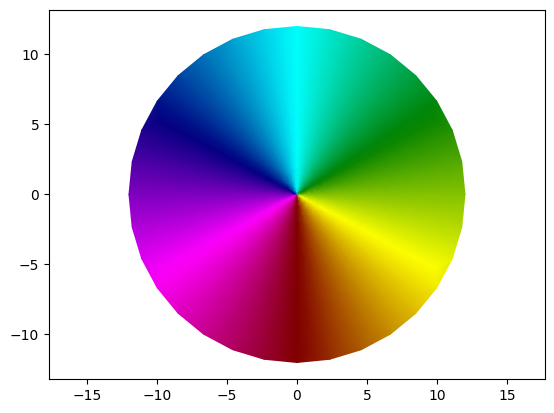

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# We can plot a legend for the polar angle or eccentricity:

# Make a 2D image of the visual field:
vfield = ny.vision.visual_field_mesh()
(vfield_x, vfield_y) = vfield.coordinates
vfield_angle = np.arctan2(vfield_y, vfield_x)
# neuropythy wants 0 to be the upper vertical meridian:
vfield_angle = np.mod(90 - 180/np.pi*vfield_angle + 180, 360) - 180
ax = ny.cortex_plot(vfield, color={'polar_angle': vfield_angle}, underlay=None)
plt.gca().axis('equal')

pass